<a href="https://colab.research.google.com/github/GurmeetsinghRelusinghani28/Abhivriddhi_Event/blob/main/Skin_disease_predictio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-determinism|

/bin/bash: -c: line 2: syntax error: unexpected end of file


Importing the dependencies

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [ ]:
from numpy.random import seed
seed(101)
import tensorflow.compat.v1 as tf
tf.compat.v1.set_random_seed(101)

import pandas as pd
import shutil
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation **

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("/content/kaggle (1).json"))

In [ ]:
#set kaggle API key as environment variables
os.environ['KAGGLE_USERNAME']= kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download -d shubhamgoel27/dermnet

Dataset URL: https://www.kaggle.com/datasets/shubhamgoel27/dermnet
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 1.72G/1.72G [00:21<00:00, 112MB/s] 
100% 1.72G/1.72G [00:21<00:00, 84.9MB/s]


In [ ]:
!ls

 dermnet.zip  'kaggle (1).json'   sample_data


In [ ]:
%%capture
!unzip /content/dermnet.zip

In [ ]:
os.listdir('/content')

print(len(os.listdir("/content/test")))
print(os.listdir("/content/test")[:5])

print(len(os.listdir("/content/train")))
print(os.listdir("/content/train")[:5])

23
['Systemic Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Seborrheic Keratoses and other Benign Tumors', 'Exanthems and Drug Eruptions', 'Melanoma Skin Cancer Nevi and Moles']
23
['Systemic Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Seborrheic Keratoses and other Benign Tumors', 'Exanthems and Drug Eruptions', 'Melanoma Skin Cancer Nevi and Moles']


Data Preprocessing

In [ ]:
# Dataset Path
base_dir = '/content/train'

(472, 720, 3)


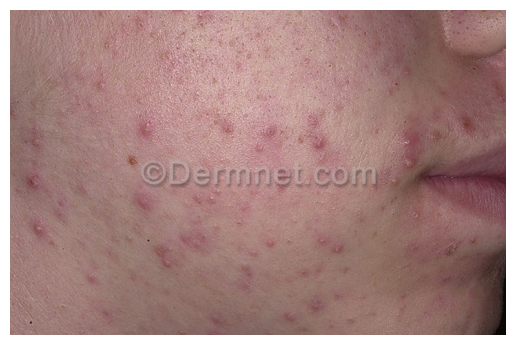

In [ ]:
image_path = '/content/train/Acne and Rosacea Photos/07Acne081101.jpg'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#Display the image
plt.imshow(img)
plt.axis('off') #Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/train/Acne and Rosacea Photos/07Acne081101.jpg'

#Read the image
img = mpimg.imread(image_path)

print(img)

[[[163 129 120]
  [155 121 112]
  [154 119 113]
  ...
  [184 145 138]
  [164 125 118]
  [154 115 108]]

 [[160 126 117]
  [155 121 112]
  [153 118 112]
  ...
  [166 127 120]
  [154 115 108]
  [158 119 112]]

 [[159 125 116]
  [160 126 117]
  [156 121 115]
  ...
  [152 113 108]
  [146 109 103]
  [153 116 110]]

 ...

 [[147 109 100]
  [150 112 103]
  [156 119 111]
  ...
  [  9   8   4]
  [  9   8   4]
  [  9   8   4]]

 [[154 115 108]
  [156 117 110]
  [153 116 110]
  ...
  [  9   8   4]
  [  9   8   4]
  [  9   8   4]]

 [[168 129 122]
  [174 135 128]
  [166 129 123]
  ...
  [  9   8   4]
  [  9   8   4]
  [  9   8   4]]]


In [ ]:
#image parameters
img_size = 128
batch_size = 32

**Train Test Split**

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
## Train Generator
train_generator = data_gen.flow_from_directory(
    "/content/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)
print(train_generator)

Found 12453 images belonging to 23 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    "/content/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 3104 images belonging to 23 classes.


Convolutional Neural Network

In [ ]:
print(train_generator.num_classes)

23


Classes =  23


In [ ]:
img_size = (img_size, img_size, 3)
act_func = 'relu'  # Replace with the desired activation function

Convolutional Neural Network

In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_generator.image_shape = (128, 128, 3)
# Similarly for 'validation_generator' if it also performs resizing
validation_generator.target_size = (128, 128)

Model Training

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
389/389 [==============================] - 56s 132ms/step - loss: 2.8654 - accuracy: 0.1559 - val_loss: 2.8350 - val_accuracy: 0.1575
Epoch 2/10
389/389 [==============================] - 50s 130ms/step - loss: 2.6087 - accuracy: 0.2247 - val_loss: 2.8755 - val_accuracy: 0.1643
Epoch 3/10
389/389 [==============================] - 51s 132ms/step - loss: 2.3307 - accuracy: 0.2955 - val_loss: 3.0474 - val_accuracy: 0.1695
Epoch 4/10
389/389 [==============================] - 52s 133ms/step - loss: 1.9122 - accuracy: 0.4274 - val_loss: 3.1858 - val_accuracy: 0.1782
Epoch 5/10
389/389 [==============================] - 52s 133ms/step - loss: 1.4153 - accuracy: 0.5772 - val_loss: 3.8401 - val_accuracy: 0.1714
Epoch 6/10
389/389 [==============================] - 52s 134ms/step - loss: 0.9672 - accuracy: 0.7235 - val_loss: 4.7504 - val_accuracy: 0.1604
Epoch 7/10
389/389 [==============================] - 52s 135ms/step - loss: 0.6286 - accuracy: 0.8358 - val_loss: 5.4967 - val_ac

Model Evaluation

In [ ]:
# Model Evaluation
print('Evaluating Model...')
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating Model...
97/97 [==============================] - 10s 103ms/step - loss: 7.4551 - accuracy: 0.1749
Validation Accuracy: 17.49%


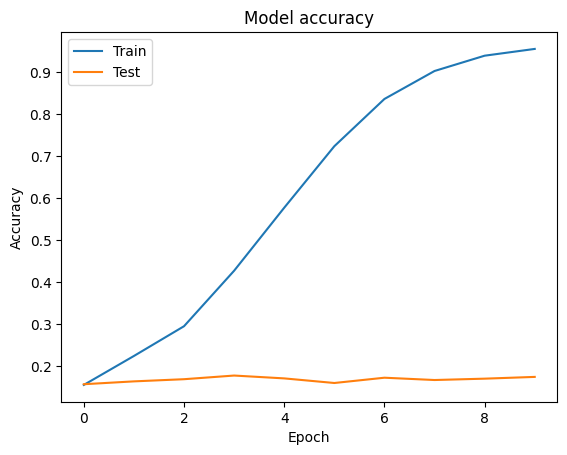

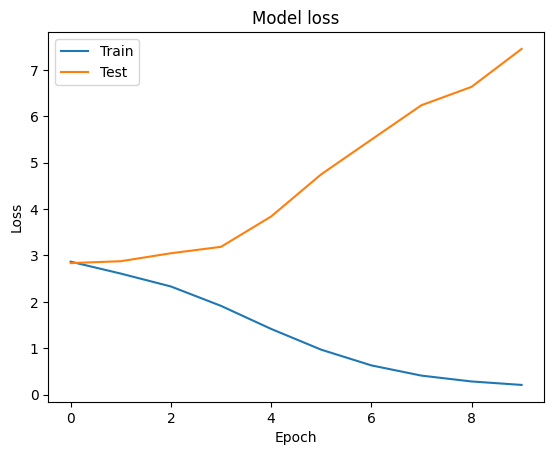

In [ ]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a Predictive System

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k,v in train_generator.class_indices.items()}

In [ ]:
# Function to load and preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(128,128)):
  #load the image
  img = Image.open(image_path)
  # Resize the image to a numpy array
  img= img.resize(target_size)
  #Convert the image into a numpy array
  img_array = np.array(img)
  #Add batch dimensions
  img_array = np.expand_dims(img_array, axis=0)
  #Scale the image values to [0, 1]
  img_array = img_array.astype('float32')/255.
  return img_array

  #Function to predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_image = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_image)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
class_indices

{0: 'Acne and Rosacea Photos',
 1: 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 2: 'Atopic Dermatitis Photos',
 3: 'Bullous Disease Photos',
 4: 'Cellulitis Impetigo and other Bacterial Infections',
 5: 'Eczema Photos',
 6: 'Exanthems and Drug Eruptions',
 7: 'Hair Loss Photos Alopecia and other Hair Diseases',
 8: 'Herpes HPV and other STDs Photos',
 9: 'Light Diseases and Disorders of Pigmentation',
 10: 'Lupus and other Connective Tissue diseases',
 11: 'Melanoma Skin Cancer Nevi and Moles',
 12: 'Nail Fungus and other Nail Disease',
 13: 'Poison Ivy Photos and other Contact Dermatitis',
 14: 'Psoriasis pictures Lichen Planus and related diseases',
 15: 'Scabies Lyme Disease and other Infestations and Bites',
 16: 'Seborrheic Keratoses and other Benign Tumors',
 17: 'Systemic Disease',
 18: 'Tinea Ringworm Candidiasis and other Fungal Infections',
 19: 'Urticaria Hives',
 20: 'Vascular Tumors',
 21: 'Vasculitis Photos',
 22: 'Warts Molluscum and other Viral

In [ ]:
# Saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
!pip install Pillow
from PIL import Image

image_path = '/content/test/Nail Fungus and other Nail Disease/acute-paronychia-2.jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

#OUTPUT the result
print("Predictive class Name :",predicted_class_name)

1/1 [==============================] - 0s 265ms/step
Predictive class Name : Cellulitis Impetigo and other Bacterial Infections


Save the model to google drive and local

In [ ]:
class_names = {"Acne and Rosacea Photos", "Actinic Keratosis Basal Cell Carcinoma", "Atopic Dermatitis Photos", "Tinea Ringworm Candidiasis and other Fungal Infections",
                    "Eczema Photos","Exanthems and Drug Eruptions","Hair Loss Photos Alopecia and other Hair Diseases","Herpes HPV and other STDs Photos",
            "Light Diseases and Disorders of Pigmentation","Lupus and other Connective Tissue diseases","Melanoma Skin Cancer Nevi and Moles",
            "Nail Fungus and other Nail Disease","Poison Ivy Photos and other Contact Dermatitis","Psoriasis pictures Lichen Planus and related diseases",
            "Scabies Lyme Disease and other Infestations and Bites","Seborrheic Keratoses and other Benign Tumors",
            "Systemic Disease","Tinea Ringworm Candidiasis and other Fungal Infections","Urticaria Hives","Vascular Tumors",
            "Vasculitis Photo","Warts Molluscum and other Viral Infections"}

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

<ipython-input-35-07e813155dae>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model2.hdf5')


In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install tensorflow  # or torch, depending on your model framework
!pip install pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


In [ ]:

# %%writefile app.py
# import streamlit as st
# import tensorflow as tf
# from PIL import Image
# import numpy as np

# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Load your trained model
# model = tf.keras.models.load_model('/content/my_model2.hdf5')



# def preprocess_image(image, target_size):
#     """
#     Preprocess the input image to the required size and format for the model.

#     Parameters:
#     image (PIL Image or np.array): The input image to preprocess.
#     target_size (tuple): The target size to resize the image to (height, width).

#     Returns:
#     np.array: The preprocessed image.
#     """
#      if image.size != target_size:
#         image = image.resize(target_size)
#         image_array = img_to_array(image)
#         image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
#         image_array = preprocess_input(image_array)  # Preprocess for the specific model
#      return image_array


# def make_prediction(image, model):
#     """
#     Make a prediction on the input image using the given model.

#     Parameters:
#     image (PIL Image): The input image.
#     model (keras.Model): The trained Keras model.

#     Returns:
#     np.array: The model prediction.
#     """
#      target_size = (128, 128)  # Define the target size here or pass it as an argument
#      processed_image = preprocess_image(image, target_size)
#      processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension if needed
#      prediction = model.predict(processed_image)
#      return prediction



# # Example usage
# image_path = '/content/test/Hair Loss Photos Alopecia and other Hair Diseases/acne-keloidalis-20.jpg'
# image = Image.open(image_path)
# prediction = make_prediction(image, model)

# print(prediction)


# # Example usage
# from PIL import Image

# image_path = '/content/test/Hair Loss Photos Alopecia and other Hair Diseases/acne-keloidalis-20.jpg'
# image = Image.open(image_path)
# processed_image = preprocess_image(image, target_size=(128, 128))  # Resize to (128, 128)

# # Now you can make a prediction with the correctly shaped image
# prediction = model.predict(processed_image)


# def make_prediction(image, model):
#     processed_image = preprocess_image(image)
#     prediction = model.predict(processed_image)
#     return prediction

# # Streamlit app
# st.title("Skin Diseases Classification")

# # File uploader
# uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# if uploaded_file is not None:
#     # Display the uploaded image
#     image = Image.open(uploaded_file)
#     st.image(image, caption='Uploaded Image.', use_column_width=True)

#     # Make prediction
#     prediction = make_prediction(image, model)

#     # Assuming your model's output is a probability distribution over classes
#     class_names = ["Acne and Rosacea Photos", "Actinic Keratosis Basal Cell Carcinoma", "Atopic Dermatitis Photos", "Tinea Ringworm Candidiasis and other Fungal Infections",
#                     "Eczema Photos","Exanthems and Drug Eruptions","Hair Loss Photos Alopecia and other Hair Diseases","Herpes HPV and other STDs Photos",
#             "Light Diseases and Disorders of Pigmentation","Lupus and other Connective Tissue diseases","Melanoma Skin Cancer Nevi and Moles",
#             "Nail Fungus and other Nail Disease","Poison Ivy Photos and other Contact Dermatitis","Psoriasis pictures Lichen Planus and related diseases",
#             "Scabies Lyme Disease and other Infestations and Bites","Seborrheic Keratoses and other Benign Tumors",
#             "Systemic Disease","Tinea Ringworm Candidiasis and other Fungal Infections","Urticaria Hives","Vascular Tumors",
#             "Vasculitis Photo","Warts Molluscum and other Viral Infections"]  # Replace with your actual class names
#     predicted_class = class_names[np.argmax(prediction)]
#     confidence = np.max(prediction) * 100

#     st.write(f"Predicted Class: {predicted_class}")
#     st.write(f"Confidence: {confidence:.2f}%")




In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load your trained model
model = tf.keras.models.load_model('/content/my_model2.hdf5')

def preprocess_image(image, target_size):
    """
    Preprocess the input image to the required size and format for the model.

    Parameters:
    image (PIL Image or np.array): The input image to preprocess.
    target_size (tuple): The target size to resize the image to (height, width).

    Returns:
    np.array: The preprocessed image.
    """
    if image.size != target_size:
        image = image.resize(target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = preprocess_input(image_array)  # Preprocess for the specific model
    return image_array

def make_prediction(image, model):
    """
    Make a prediction on the input image using the given model.

    Parameters:
    image (PIL Image): The input image.
    model (keras.Model): The trained Keras model.

    Returns:
    np.array: The model prediction.
    """
    target_size = (128, 128)  # Define the target size here or pass it as an argument
    processed_image = preprocess_image(image, target_size)
    prediction = model.predict(processed_image)
    return prediction

# Streamlit app
st.title("Skin Diseases Classification")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    # Make prediction
    prediction = make_prediction(image, model)

    # Assuming your model's output is a probability distribution over classes
    class_names = ["Acne and Rosacea Photos", "Actinic Keratosis Basal Cell Carcinoma", "Atopic Dermatitis Photos", "Tinea Ringworm Candidiasis and other Fungal Infections",
                   "Eczema Photos", "Exanthems and Drug Eruptions", "Hair Loss Photos Alopecia and other Hair Diseases", "Herpes HPV and other STDs Photos",
                   "Light Diseases and Disorders of Pigmentation", "Lupus and other Connective Tissue diseases", "Melanoma Skin Cancer Nevi and Moles",
                   "Nail Fungus and other Nail Disease", "Poison Ivy Photos and other Contact Dermatitis", "Psoriasis pictures Lichen Planus and related diseases",
                   "Scabies Lyme Disease and other Infestations and Bites", "Seborrheic Keratoses and other Benign Tumors",
                   "Systemic Disease", "Tinea Ringworm Candidiasis and other Fungal Infections", "Urticaria Hives", "Vascular Tumors",
                   "Vasculitis Photo", "Warts Molluscum and other Viral Infections"]  # Replace with your actual class names
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    st.write(f"Predicted Class: {predicted_class}")
    st.write(f"Confidence: {confidence:.2f}%")


Writing app.py


In [ ]:
# Install ngrok
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok.zip

# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok.zip
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip



--2024-06-26 08:06:02--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  59.7MB/s    in 0.2s    

2024-06-26 08:06:04 (59.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip



Archive:  /content/ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
# Authenticate ngrok (Replace YOUR_NGROK_AUTH_TOKEN with your actual ngrok auth token)
# token_to =
# !ngrok uninstall
# !ngrok
!./ngrok authtoken 2h425FtJwa6mcaCMbwmFAOG7jkl_2m8Di1REviPZgNADmJkSV
!./ngrok http 8501

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Your ngrok-agent version "2.3.41" is too old. The minimum supported agent version for your account is "3.2.0". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.

ERR_NGROK_121



In [ ]:
import subprocess
from pyngrok import ngrok

ngrok.set_auth_token("2h425FtJwa6mcaCMbwmFAOG7jkl_2m8Di1REviPZgNADmJkSV")
# Run the Streamlit app in the background
process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# Create a tunnel to the Streamlit app
# public_url = ngrok.connect(port='8051')
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")

# Keep the process running
process.wait()


Streamlit app is live at NgrokTunnel: "https://55ba-34-74-146-221.ngrok-free.app" -> "http://localhost:8501"





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.171.74:8501

  Stopping...
^C
